## Massive data analysis and mining
### Analysis of strategies used in the Pyrates application
#### **Students**: Name1 & Name2

## 1) Libraries importation

In [1]:
import program_parsing
import pandas as pd
import re
import ast
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

## 2) Import data from CSV

In [2]:
code_data = pd.read_excel("data/data_set.xlsx",header = 0)
# Number of programs by level
level_data = code_data["level_id"]
level_count = level_data.value_counts()
print(level_count)

level_id
1    121109
2    101487
3     63944
4     40893
5     28619
6     23770
7     20487
8     11479
Name: count, dtype: int64


## 3) Get features from programs

### Extract features

In [3]:
levels_df = {}
for level_key in level_count.index.tolist():
    level_features = []
    # Get current level programs
    level_code_data = code_data[code_data["level_id"]==level_key]
    # Keep only code
    level_code_data = level_code_data["code"]
    for code in level_code_data.values:
        # replace tabulations by four spaces
        code = re.sub("\t", "    ", str(code))
        # get abstract syntax tree from code
        code_ast = ast.parse(code)
        # extracts features from programs
        program_parsing.Parentage().visit(code_ast)
        program_parser = program_parsing.programParser()
        program_parser.visit(code_ast)
        code_features_dict = program_parser.features_dict
        level_features.append(code_features_dict)
    level_df =  pd.DataFrame(level_features, columns=program_parsing.ALL_KEYS)
    levels_df[level_key] = level_df

### Keep only relevant features

In [4]:
for level_key, level_df in levels_df.items():
    level_feature_keys = program_parsing.ALLOWED_KEYS_BY_LEVEL[level_key]
    levels_df[level_key]  = level_df[level_feature_keys]
    
print(levels_df[1])

        nb-var-affectation-concept  nb-boolean-concept  nb-string-concept  \
0                                0                   0                  0   
1                                0                   0                  0   
2                                0                   0                  0   
3                                0                   0                  0   
4                                0                   0                  0   
...                            ...                 ...                ...   
121104                           0                   0                  0   
121105                           0                   0                  0   
121106                           0                   0                  0   
121107                           0                   0                  0   
121108                           0                   0                  0   

        nb-if-branch-concept  nb-elif-branch-concept  nb-else-branch-concep

### Quick look at the dataframes

In [5]:
for level_key, level_df in levels_df.items():
    print("************** Level "+str(level_key)+" **************")
    print(level_df.info())

************** Level 1 **************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121109 entries, 0 to 121108
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   nb-var-affectation-concept  121109 non-null  int64
 1   nb-boolean-concept          121109 non-null  int64
 2   nb-string-concept           121109 non-null  int64
 3   nb-if-branch-concept        121109 non-null  int64
 4   nb-elif-branch-concept      121109 non-null  int64
 5   nb-else-branch-concept      121109 non-null  int64
 6   nb-for-simple-concept       121109 non-null  int64
 7   nb-for-counter-0-concept    121109 non-null  int64
 8   nb-for-counter-n-concept    121109 non-null  int64
 9   nb-while-concept            121109 non-null  int64
 10  walk                        121109 non-null  int64
 11  left                        121109 non-null  int64
 12  right                       121109 non-null  int64
 13  open  

### Export dataframes for manual checking

In [7]:
for level_key, level_df in levels_df.items():
    level_df.to_excel("data/df_"+str(level_key)+".xlsx")

## 4) K-means

In [12]:
X1 = levels_df[1]
sample1 = X1.sample(n=30000)

X2 = levels_df[2]
sample2 = X2.sample(n=30000)

X3 = levels_df[3]
sample3 = X3.sample(n=30000)

X4 = levels_df[4]
sample4 = X4

X5 = levels_df[5]
sample5 = X5

X6 = levels_df[6]
sample6 = X6

X7 = levels_df[7]
sample7 = X7

X8 = levels_df[8]
sample8 = X8

samples = [sample1, sample2, sample3, sample4, sample5, sample6, sample7, sample8]

======================= SAMPLE 1 =====================


C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

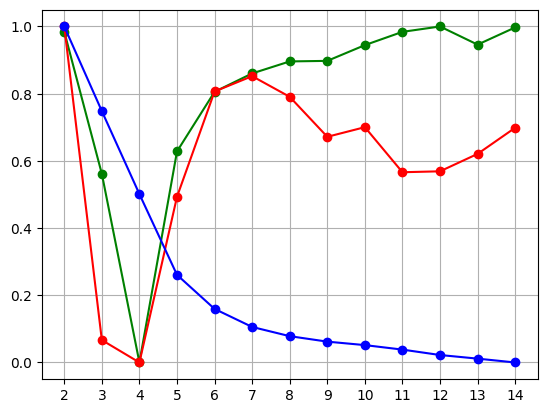

======================= SAMPLE 2 =====================


C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

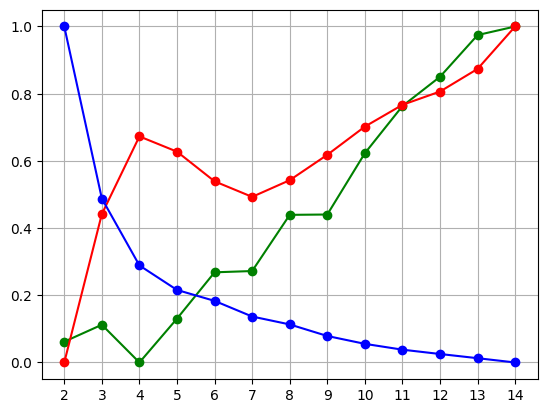

======================= SAMPLE 3 =====================


C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

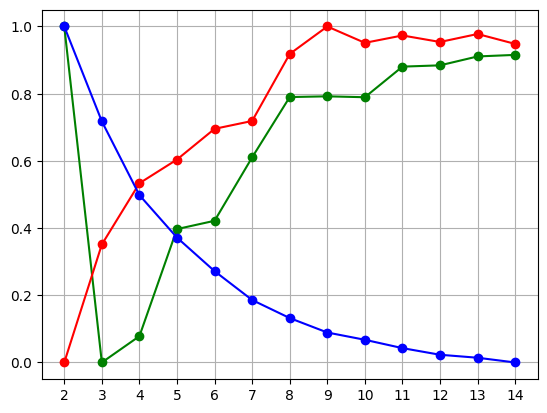

======================= SAMPLE 4 =====================


C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

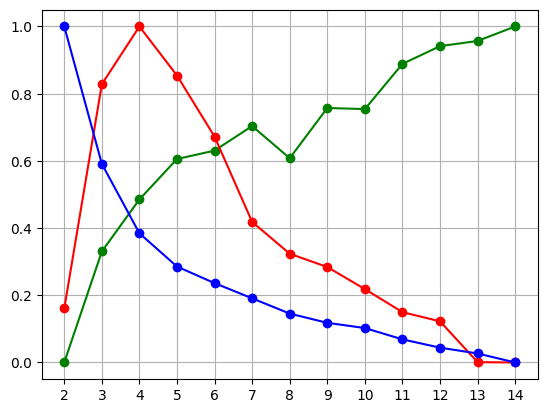

======================= SAMPLE 5 =====================


C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

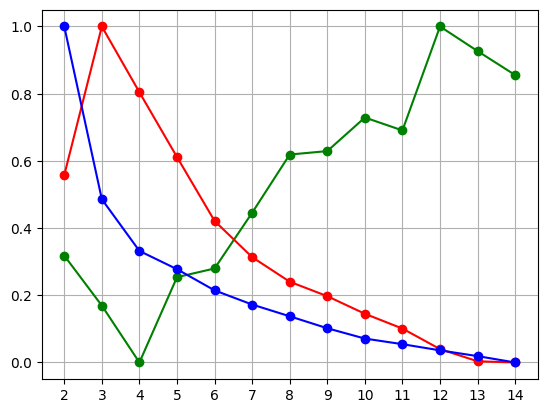

======================= SAMPLE 6 =====================


C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

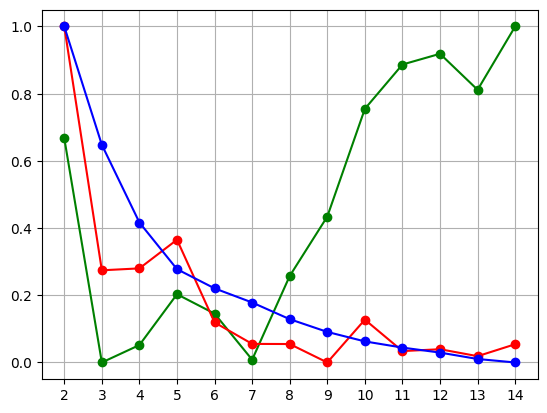

======================= SAMPLE 7 =====================


C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

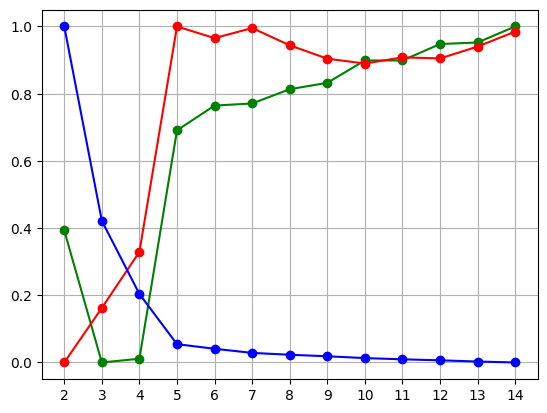

======================= SAMPLE 8 =====================


C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

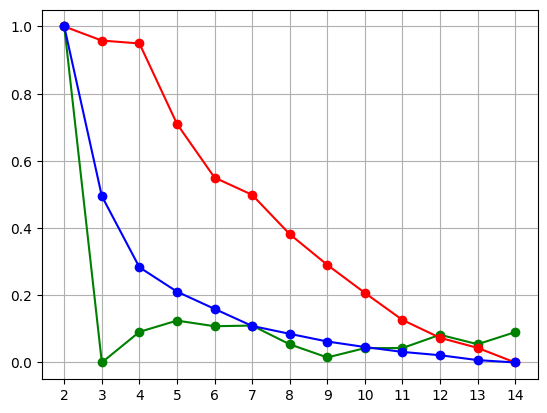

In [26]:
k_range = range(2, 15)

for i in range(8):
    print(f"======================= SAMPLE {i+1} =====================") 
    silhouette_list = []
    calinski_harabasz_list = []
    inertia_list = []
    for k in k_range:
        model_t = KMeans(n_clusters=k)
        labels_t = model_t.fit(samples[i]).labels_
        inertia = model_t.fit(samples[i]).inertia_
        
        silhouette_list.append(silhouette_score(samples[i], labels_t))
        calinski_harabasz_list.append(calinski_harabasz_score(samples[i], labels_t))
        inertia_list.append(inertia)
        
    silhouette_list = minmax_scale(silhouette_list)
    calinski_harabasz_list = minmax_scale(calinski_harabasz_list)
    inertia_list= minmax_scale(inertia_list)
    plt.plot(k_range, silhouette_list, 'go-')
    plt.plot(k_range, calinski_harabasz_list, 'ro-')
    plt.plot(k_range, inertia_list, 'bo-')
    plt.grid(visible=True)
    plt.xticks(k_range)
    plt.show()

Nombre k de clusters par niveau :  

Niveau 1 : 6
Niveau 2 : 4
Niveau 3 : 5
Niveau 4 : 4
Niveau 5 : 4
Niveau 6 : 5
Niveau 7 : 5
Niveau 8 : 4

In [14]:
kmeansModel1 = KMeans(n_clusters=7)
kmeansModel1.fit(X1)

kmeansModel2 = KMeans(n_clusters=4)
kmeansModel2.fit(X2)

kmeansModel3 = KMeans(n_clusters=5)
kmeansModel3.fit(X3)

kmeansModel4 = KMeans(n_clusters=4)
kmeansModel4.fit(X4)

kmeansModel5 = KMeans(n_clusters=4)
kmeansModel5.fit(X5)

kmeansModel6 = KMeans(n_clusters=5)
kmeansModel6.fit(X6)

kmeansModel7 = KMeans(n_clusters=5)
kmeansModel7.fit(X7)

kmeansModel8 = KMeans(n_clusters=4)
kmeansModel8.fit(X8)

C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

KMeans(n_clusters=4)

In [18]:
dataFrames = [X1, X2, X3, X4, X5, X6, X7, X8]

In [15]:
kmeansModels = [kmeansModel1, kmeansModel2, kmeansModel3, kmeansModel4, kmeansModel5, kmeansModel6, kmeansModel7, kmeansModel8]

In [16]:
# Strategies
for i in range(8):
    print(f"========================== LEVEL {i+1} ==========================")
    df = dataFrames[i]
    df_len = len(df)
    labels = kmeansModels[i].labels_
    centers = kmeansModels[i].cluster_centers_
    unique, counts = np.unique(labels, return_counts=True)    
    for k in range(len(centers)):        
        print(f"---------- Strategy {k+1} ({round((counts[k]/len(df))*100, 2)} %) --------------")
        actions = []
        values = []
        for j in range(len(centers[k])):            
            rounded_value = round(centers[k][j]) 
            if rounded_value > 0:
                action = program_parsing.ALLOWED_KEYS_BY_LEVEL[i+1][j]
                actions.append(action)
                values.append(rounded_value)
                print(f"{action} : {rounded_value}")
    print('\n')

========================== LEVEL 1 ==========================
---------- Strategy 1 (92.83 %) --------------
nb-for-simple-concept : 1
walk : 4
left : 1
right : 2
open : 1
---------- Strategy 2 (0.46 %) --------------
walk : 20
left : 1
right : 2
open : 1
---------- Strategy 3 (2.76 %) --------------
nb-for-simple-concept : 1
walk : 5
left : 1
right : 2
open : 1
---------- Strategy 4 (2.86 %) --------------
nb-for-simple-concept : 1
walk : 4
left : 2
right : 2
open : 1
---------- Strategy 5 (0.24 %) --------------
nb-if-branch-concept : 1
nb-for-counter-0-concept : 1
walk : 1
left : 1
right : 1
open : 1
---------- Strategy 6 (0.85 %) --------------
nb-for-simple-concept : 2
walk : 3
left : 1
right : 2
open : 1
---------- Strategy 7 (0.0 %) --------------
nb-string-concept : 27
nb-if-branch-concept : 1
nb-elif-branch-concept : 3
walk : 1
left : 1
right : 1
open : 1


========================== LEVEL 2 ==========================
---------- Strategy 1 (37.11 %) --------------
nb-for-simpl

## 5) DBSCAN

In [13]:
#MIN_SAMPLES = [28, 32, 28, 30, 30, 26, 24, 32]     # 2 times nb features
MIN_SAMPLES = [30 for i in range(8)]    
zoom_x = [(25000, 30000), (25000, 30000), (25000, 30000), (35000, 45000), (21000, 30000), (20000, 25000), (19000, 21000), (10000, 12000)]     # 2 times nb features
zoom_y = [(0, 2), (0, 2), (0, 2), (0, 2.5), (0, 3), (0, 2), (0, 3), (0, 15)]     # 2 times nb features

=================== SAMPLE 1 =================


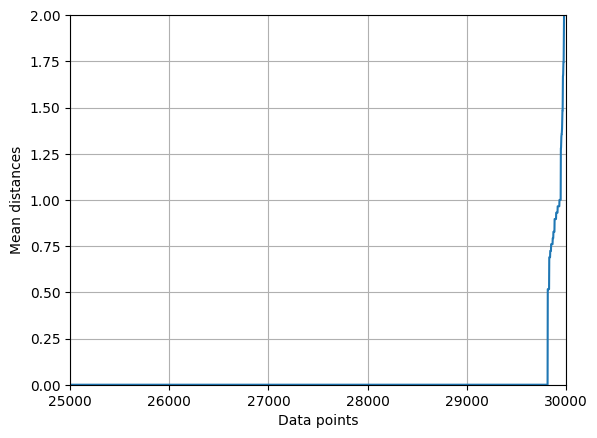

=================== SAMPLE 2 =================


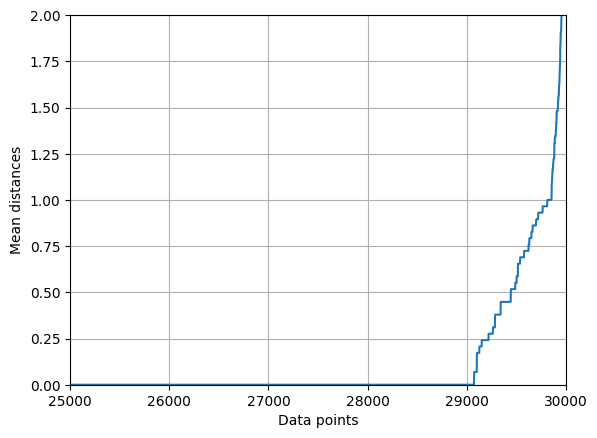

=================== SAMPLE 3 =================


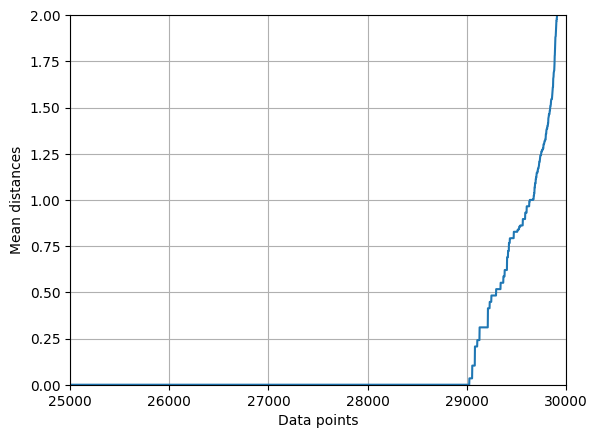

=================== SAMPLE 4 =================


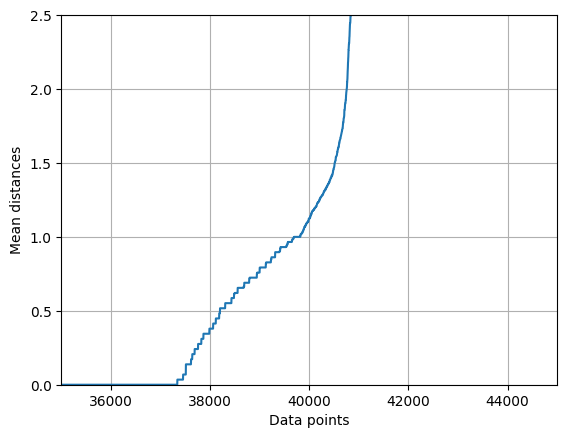

=================== SAMPLE 5 =================


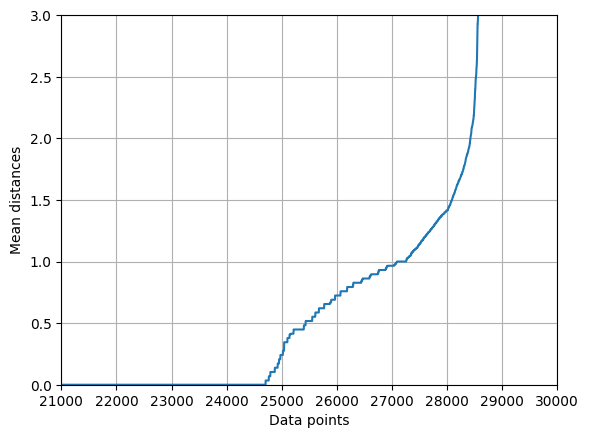

=================== SAMPLE 6 =================


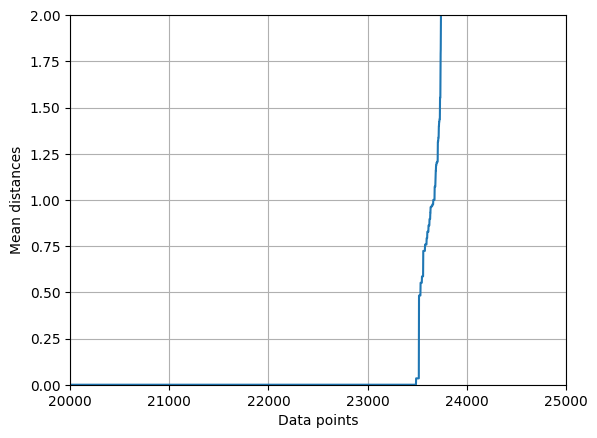

=================== SAMPLE 7 =================


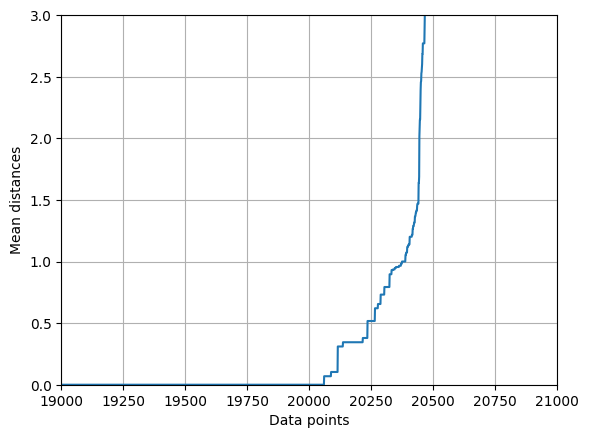

=================== SAMPLE 8 =================


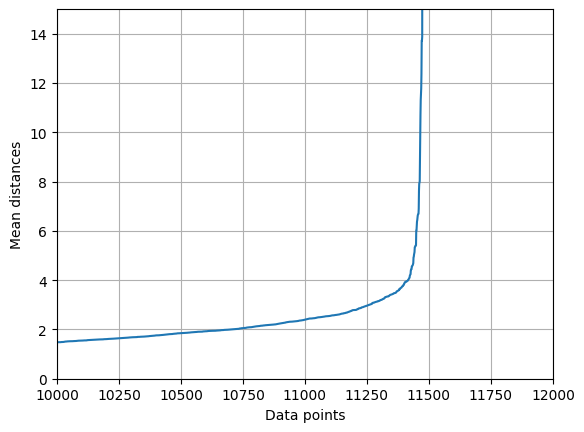

In [14]:
for i in range(8):
    print(f"=================== SAMPLE {i+1} =================")
    model_t = NearestNeighbors(n_neighbors=MIN_SAMPLES[i]).fit(samples[i])
    distances, _ = model_t.kneighbors(samples[i])
    avg_distance = np.mean(distances[:, 1:], axis=1)
    sorted_distances = np.sort(avg_distance)
    plt.plot(sorted_distances)
    plt.grid(visible=True)
    plt.xlabel('Data points')
    plt.ylabel('Mean distances')
    plt.xlim(zoom_x[i])
    plt.ylim(zoom_y[i])
    plt.show()

In [23]:
EPS_SEARCH_RANGES = [(0.75, 1, 0.015625), (0.75, 1, 0.015625), (0.75, 1, 0.015625), (1.4375, 1.6875, 0.015625), (1.4375, 1.6875, 0.015625), (0.75, 1, 0.015625), (1.4375, 1.6875, 0.015625), (4.4375, 4.6875, 0.015625)]

In [16]:
sample1 = X1.sample(n=10000)

sample2 = X2.sample(n=10000)

sample3 = X3.sample(n=10000)

sample4 = X4.sample(n=10000)

sample5 = X5.sample(n=10000)

sample6 = X6.sample(n=10000)

sample7 = X7.sample(n=10000)

sample8 = X8.sample(n=10000)

samples = [sample1, sample2, sample3, sample4, sample5, sample6, sample7, sample8]

In [31]:
dbscanModels = []

for i in range(8):
    epsilon_values = np.arange(start=EPS_SEARCH_RANGES[i][0],
                               stop=EPS_SEARCH_RANGES[i][1],
                               step=EPS_SEARCH_RANGES[i][2])
    
    print(f"Testing epsilon values for level {i+1} : {epsilon_values}")
    # df = dataFrames[i]
    sample = samples[i]
    
    max_score = 0
    best_epsilon = 0.5
    for eps in epsilon_values:
        model_t = DBSCAN(eps=eps, min_samples=MIN_SAMPLES[i])
        labels = model_t.fit(sample).labels_
        unique_labels = set(labels)
        nb_labels = len(unique_labels)
        if nb_labels > 1:
            sil_score = silhouette_score(sample, labels)
            if sil_score > max_score:
                max_score = sil_score
                best_epsilon = eps
    print(f"Best epsilon level {i+1} : {best_epsilon}")
    best_model = DBSCAN(eps=best_epsilon, min_samples=MIN_SAMPLES[i])
    # best_model.fit(df)    Doing it later because it makes memory error for full data sets
    dbscanModels.append(best_model)
    print("----------------------------------------------------")

Testing epsilon values for level 1 : [0.75     0.765625 0.78125  0.796875 0.8125   0.828125 0.84375  0.859375
 0.875    0.890625 0.90625  0.921875 0.9375   0.953125 0.96875  0.984375]
Best epsilon level 1 : 0.75
----------------------------------------------------
Testing epsilon values for level 2 : [0.75     0.765625 0.78125  0.796875 0.8125   0.828125 0.84375  0.859375
 0.875    0.890625 0.90625  0.921875 0.9375   0.953125 0.96875  0.984375]
Best epsilon level 2 : 0.75
----------------------------------------------------
Testing epsilon values for level 3 : [0.75     0.765625 0.78125  0.796875 0.8125   0.828125 0.84375  0.859375
 0.875    0.890625 0.90625  0.921875 0.9375   0.953125 0.96875  0.984375]
Best epsilon level 3 : 0.75
----------------------------------------------------
Testing epsilon values for level 4 : [1.4375   1.453125 1.46875  1.484375 1.5      1.515625 1.53125  1.546875
 1.5625   1.578125 1.59375  1.609375 1.625    1.640625 1.65625  1.671875]
Best epsilon level 4 

In [30]:
# Fit models
for i in range(len(dbscanModels)):
    print(f"Fitting dscan model for level {i+1}")
    dbscanModels[i].fit(dataFrames[i]) 
print("Done fitting dbscan models")

Fitting dscan model for level 1


MemoryError: 

In [ ]:
# Strategies
for i in range(8):
    print(f"========================== LEVEL {i+1} ==========================")
    df = dataFrames[i]
    df_len = len(df)
    labels = kmeansModels[i].labels_
    centers = kmeansModels[i].cluster_centers_
    unique, counts = np.unique(labels, return_counts=True)    
    for k in range(len(centers)):        
        print(f"---------- Strategy {k+1} ({round((counts[k]/len(df))*100, 2)} %) --------------")
        actions = []
        values = []
        for j in range(len(centers[k])):            
            rounded_value = round(centers[k][j]) 
            if rounded_value > 0:
                action = program_parsing.ALLOWED_KEYS_BY_LEVEL[i+1][j]
                actions.append(action)
                values.append(rounded_value)
                print(f"{action} : {rounded_value}")
    print('\n')

## 6) Analysis

### 6.1) Level 1
S1.1 (92.83 %):
```
avancer()
droite()
avancer()
gauche()
avancer()
droite()
for _ in range(16):
    avancer()
ouvrir()
```


### 6.2) Level 2
S2.1 (for-re) (37.11 %):
```
for _ in range(6):
    sauter()
    avancer()
avancer()
gauche()
for _ in range(2):
    avancer()
for _ in range(9):
    coup()
    avancer()
avancer()
ouvrir()
```

S2.1 (for-re) [Stratégie visée] (36.62 %):
```
for _ in range(6):
    sauter()
    avancer()
avancer()
gauche()
avancer()
avancer()
for _ in range(9):
    coup()
    avancer()
avancer()
ouvrir()
```

### 6.3) Level 3
S1.1 (92.83 %):
```
avancer()
droite()
avancer()
gauche()
avancer()
droite()
for _ in range(16):
    avancer()
ouvrir()
```

### 6.4) Level 4
TODO

### 6.5) Level 5
TODO

### 6.6) Level 6
TODO

### 6.7) Level 7
TODO

### 6.8) Level 8
TODO